Part 1: Foundational Data Analysis
Kickstarter, the crowdfunding platform, is thinking about providing a consulting service to project founders to help its customers create more successful crowdfunding campaigns. You’ve been asked to do some initial analysis. 
In order to complete this assignment, please follow the link and download the following Kickstarter dataset: http://bit.ly/2cgMGDm. Use the dataset to complete this task.

We are tools agnostics, you can use any tools you’d like: Excel, Python, SQL, Tableau, Google spreadsheets, etc. We recommend using whatever tool you know best, we're here to find out how you think about solving data problems, not which tool you can do it in.

In [14]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [7]:
df = pd.read_csv('DSI_kickstarterscrape_dataset.csv', engine='python')

In [15]:
backup = df.copy()

In [8]:
df.head(5)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [9]:
col = ['status', 'goal', 'pledged', 'funded percentage', 'backers', 'levels', 'duration']
filtered_df = df[col].copy()

In [11]:
filtered_df.head(10)

,status,goal,pledged,funded percentage,backers,levels,duration
0,successful,10500.0,11545.0,1.099524,66,7,30.00
1,failed,4000.0,20.0,0.005000,2,5,47.18
2,live,20000.0,56.0,0.002800,3,10,28.00
3,successful,6000.0,6535.0,1.089167,100,13,32.22
4,failed,3500.0,0.0,0.000000,0,6,30.00
5,successful,3500.0,3582.0,1.023331,39,7,21.43
6,failed,1000.0,280.0,0.280000,8,5,30.00
7,successful,2000.0,2180.0,1.090000,46,7,30.00
8,successful,1000.0,1125.0,1.125000,30,12,67.53
9,successful,7500.0,9836.0,1.311527,255,10,35.29


In [12]:
filtered_df['pledged'].mean()

4980.749678963979

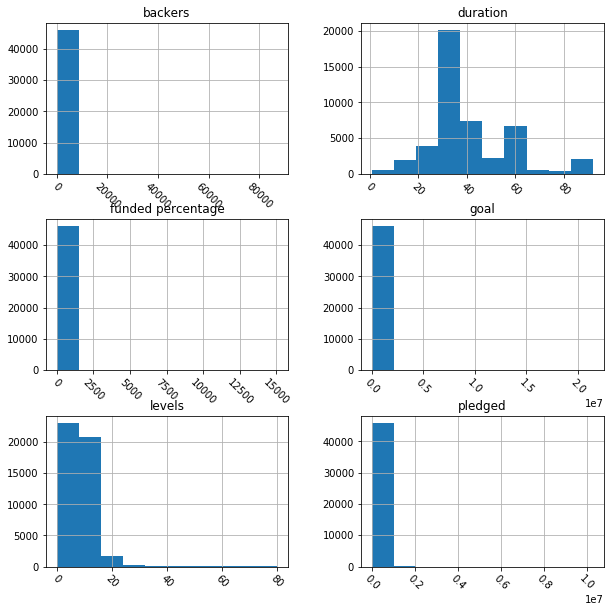

In [17]:
filtered_df.hist(xrot=-45, figsize=(10,10))
plt.show()

In [18]:
filtered_df.describe()

,goal,pledged,funded percentage,backers,levels,duration
count,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.000000
mean,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,39.995547
std,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,17.414458
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,30.000000
50%,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,32.000000
75%,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,48.390000
max,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,91.960000


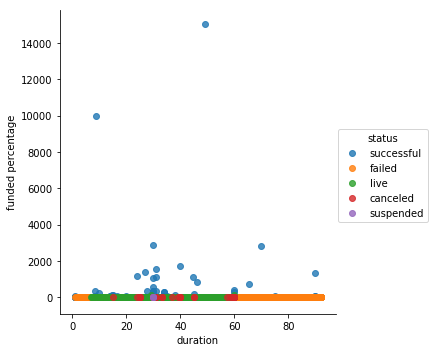

In [22]:
sns.lmplot(x='duration', y='funded percentage', hue='status', data=filtered_df, fit_reg=False)
plt.show()

In [ ]:
#lump canceled and suspended into failed. Ignore live